In [1]:
# pip install selenium



In [2]:
# pip install pandas

     |████████████████████████████████| 11.8 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 19.8 MB 44 kB/s  eta 0:00:01     |███████████████████████████████▌| 19.5 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 1.3 MB/s eta 0:00:01    |██████▌                         | 102 kB 1.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install beautifulsoup4


     |████████████████████████████████| 142 kB 4.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# pip install msedge-selenium-tools

     |████████████████████████████████| 904 kB 2.7 MB/s eta 0:00:01
  Attempting uninstall: selenium
    Found existing installation: selenium 4.9.0
    Uninstalling selenium-4.9.0:
      Successfully uninstalled selenium-4.9.0
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [85]:
import csv
import re
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from msedge.selenium_tools import Edge, EdgeOptions
from textblob import TextBlob

In [86]:
# firefox and chrome
# driver = webdriver.Firefox()
driver = webdriver.Chrome()

In [87]:
# edge
# options = EdgeOptions()
# options.use_chromium = True
# driver = Edge(options=options)

In [88]:
url = "https://www.amazon.com"
driver.get(url)

In [89]:
def get_url(search_term):
    """ Generate a url from search term."""
    template = url+"/s?k={}&ref=nb_sb_noss_1"
    search_term = search_term.replace(' ', '+')
    return template.format(search_term)

In [90]:
url = get_url('health wearable devices')

In [91]:
driver.get(url)

In [92]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [93]:
result = soup.find_all('div', {'data-component-type': 's-search-result'})

In [94]:
def get_product_title(product_element):
    product_name = product_element.h2.a.span
    return (product_name.get_text())

In [95]:
def get_product_url(product_element):
    atag = product_element.h2.a
    url = 'https://www.amazon.com' + atag.get('href')
    return url

In [96]:
def text_preprocessor(text):
    review = re.sub(r"[a-zA-Z0-9]", " ", text)
    tokens = word_tokenize(review.lower())
    # remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # join tokens back into a string
    clean_review = " ".join(tokens)
    return clean_review


In [97]:
def get_single_review(review_element):
    try:
        review_title = review_element.find(
            'a', {'data-hook': 'review-title'}).span.text
        review_rating = review_element.find(
            'a', {'class': 'a-link-normal'}).get('title')[0:3]
        description = review_element.find(
            'div', {'data-hook': 'review-collapsed'}).span.text
        string = re.sub(r"[^a-zA-Z0-s]+", " ", description)
        blob = TextBlob(string)
        sentiment_score = blob.sentiment.polarity
        if sentiment_score > 0:
            sentiment = 'positive'
        elif sentiment_score < 0:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'
        print(f'Sentiment: {sentiment}\n')
        return (review_title, review_rating, string, sentiment)
    except Exception:
        print(Exception)

In [98]:
def get_product_reviews(product_url):
    driver.get(url)
    product = BeautifulSoup(driver.page_source, 'html.parser')
    reviews_elements = product.find_all('div', {'data-hook': 'review'})

    reviews = []

    for tweet_review in reviews_elements:
        review = get_single_review(tweet_review)
        reviews.append(review)

    return reviews

In [99]:
def generate_single_product_review_csv(data, name):
    # for index, item in enumerate(products):
    #     print(item)
    #     url = get_product_url(item)
    #     product_name = get_product_title(item)
    #     reviews = get_product_reviews(url)
    #     print(reviews)
    df = pd.DataFrame(data, columns=[
        'review_title', 'review_rating', 'review_description', 'sentimental_score'])
    df.to_csv(name, index=False)

In [100]:
# url = get_product_url(result[1])
# reviews = get_product_reviews(url)
print(len(result))
# generate_single_product_review_csv(result)

for item in result:
    url = get_product_url(item)
    product_name = get_product_title(item)
    string = re.sub(r"[^a-zA-Z0-s]+", " ", product_name)
    reviews = get_product_reviews(url)
    generate_single_product_review_csv(reviews, string+".csv")
    # print(len(reviews))
    # print(product_name)

22
Sentiment: positive

Sentiment: positive

Sentiment: negative

Sentiment: positive

Sentiment: negative

Sentiment: neutral

Sentiment: positive

Sentiment: positive

Sentiment: positive

Sentiment: neutral

Sentiment: positive

Sentiment: positive

Sentiment: positive

Sentiment: positive

Sentiment: positive

Sentiment: positive

Sentiment: positive

Sentiment: positive

Sentiment: negative

Sentiment: positive

Sentiment: negative

Sentiment: negative

Sentiment: positive

Sentiment: positive

Sentiment: positive

Sentiment: positive

<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
Sentiment: positive

Sentiment: negative

Sentiment: positive

Sentiment: positive

<class 'Exception'>
<class 'Exception'>
Sentiment: positive

Sentiment: negative

Sentiment: positive

<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
Sentiment: positive

Sentiment: negative

Sentiment: positive

Sen

ValueError: Shape of passed values is (8, 1), indices imply (8, 4)

In [101]:
import glob 
import pandas as pd

In [102]:
dir_files = "./"

csv_files = glob.glob(dir_files+'*.csv')

In [103]:
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

final_df = pd.concat(dfs)

In [104]:
final_df

,review_title,review_rating,review_description,sentimental_score
0,"Good, but could be better",4.0,You ll probably think that I m being overly cr...,positive
1,Can't get it to connect to PC program.,4.0,Have had zero luck getting it to connect to th...,positive
2,App data is most detailed,4.0,Purchased for night time measurements Read oth...,positive
3,software used to connect to Win10 PC stopped w...,3.0,UPDATE:Odd how the O2 Insight Pro software wor...,positive
0,A nice step up for the Charge series,4.0,UPDATE May 2022: I m still a big fan of this p...,positive
...,...,...,...,...
3,"Easy install, easy to use",4.0,First of all there was a message on the box to...,positive
4,No refund,2.0,I ordered wrong item,negative
5,"I live alone, knowing I can have help by press...",5.0,Peace of mind,neutral
6,Works Great,5.0,I recently received this system and set it up ...,positive


In [105]:
# check for null values using .isnull() method
print(final_df.isnull())

# check for null values using .isna() method
print(final_df.isna())

    review_title  review_rating  review_description  sentimental_score
0          False          False               False              False
1          False          False               False              False
2          False          False               False              False
3          False          False               False              False
0          False          False               False              False
..           ...            ...                 ...                ...
3          False          False               False              False
4          False          False               False              False
5          False          False               False              False
6          False          False               False              False
7          False          False               False              False

[145 rows x 4 columns]
    review_title  review_rating  review_description  sentimental_score
0          False          False               False  

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


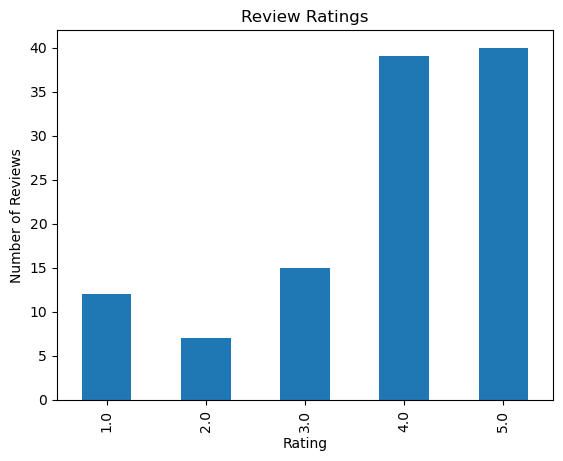

In [113]:
##Bar chart of review ratings:
# Group the data by review rating and count the number of reviews in each group
rating_counts = final_df.groupby('review_rating')['review_rating'].count()

# Create a bar chart of review ratings
rating_counts.plot(kind='bar')
plt.title('Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

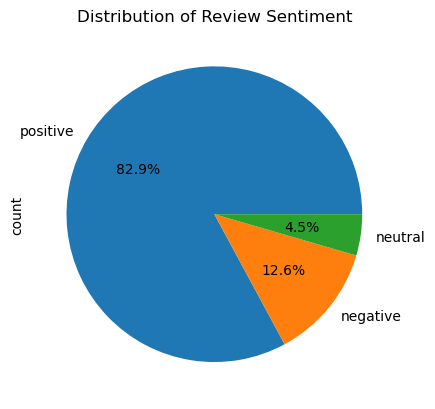

In [142]:
#Pie chart of review sentiment
final_df['sentimental_score'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Review Sentiment')
plt.show()


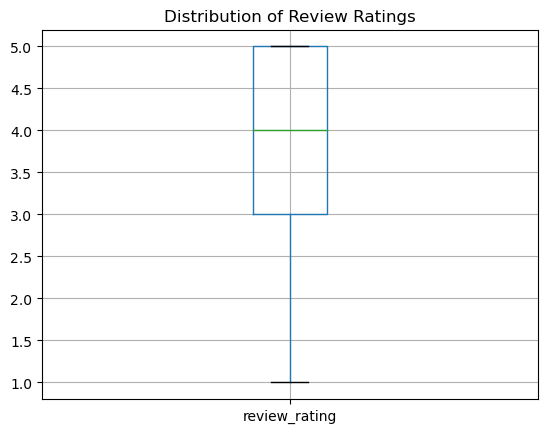

In [143]:
##Box plot of review ratings
final_df.boxplot(column='review_rating')
plt.title('Distribution of Review Ratings')
plt.show()

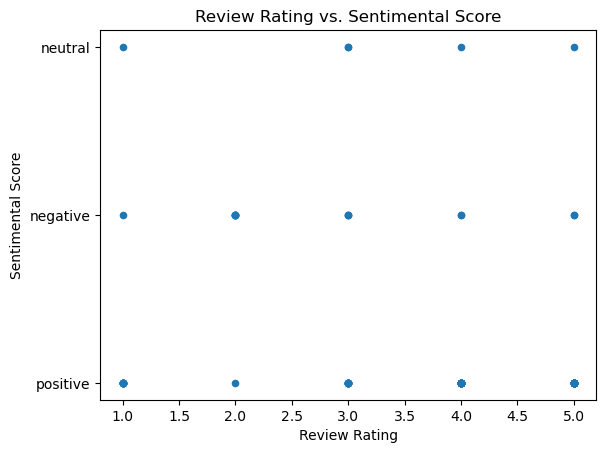

In [145]:
# Create a scatter plot of review ratings vs. sentimental score
final_df.plot(kind='scatter', x='review_rating', y='sentimental_score')
plt.xlabel('Review Rating')
plt.ylabel('Sentimental Score')
plt.title('Review Rating vs. Sentimental Score')
plt.show()


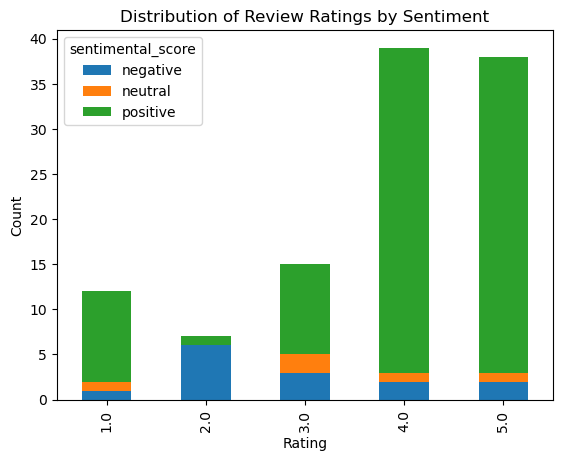

In [147]:
##Stacked bar chart of review ratings and sentiment
pd.crosstab(final_df['review_rating'], final_df['sentimental_score']).plot(kind='bar', stacked=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Review Ratings by Sentiment')
plt.show()


In [123]:
from wordcloud import WordCloud

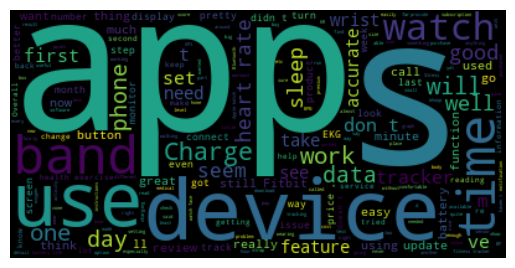

In [124]:
final_df = final_df.dropna(subset=['review_description'])
final_df['review_description'] = final_df['review_description'].astype(str)# Combine all the review descriptions into a single string
text = ' '.join(final_df['review_description'])
# Generate a word cloud from the review descriptions
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [132]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df['review_description'], final_df['sentimental_score'], test_size=0.3, random_state=42)

# Preprocess text data
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return ' '.join(stemmed_tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train logistic regression model
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

# Evaluate model on test set
y_pred = clf.predict(X_test_vec)
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.7647058823529411


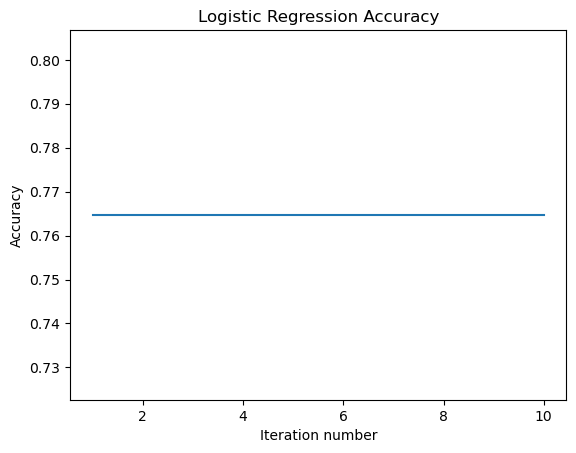

In [141]:
import matplotlib.pyplot as plt

# Train logistic regression model
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

# Evaluate model on test set and store accuracy in a list
accuracies = []
for i in range(1, 11):
    y_pred = clf.predict(X_test_vec)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy as a function of iteration number
plt.plot(range(1, 11), accuracies)
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()


In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest model
clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)

# Evaluate model on test set
y_pred = clf.predict(X_test_vec)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7647058823529411


In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [150]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df['review_description'], final_df['sentimental_score'], test_size=0.2, random_state=42)

# Preprocess text data
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return ' '.join(stemmed_tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)# Train Multinomial Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Evaluate model on test set
y_pred = clf.predict(X_test_vec)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7391304347826086
